In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df=pd.read_csv("surveyofbodyfat.csv")

In [4]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [6]:
df.shape

(252, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


In [11]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [54]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
colors=['#ffcd94','#eac086','#ffad60','#ffe39f']
sns.set_palette(sns.color_palette(colors))

In [15]:
###Exploratory Data Analysis###

Text(0.5, 0.98, 'Visualizing Continuous Columns')

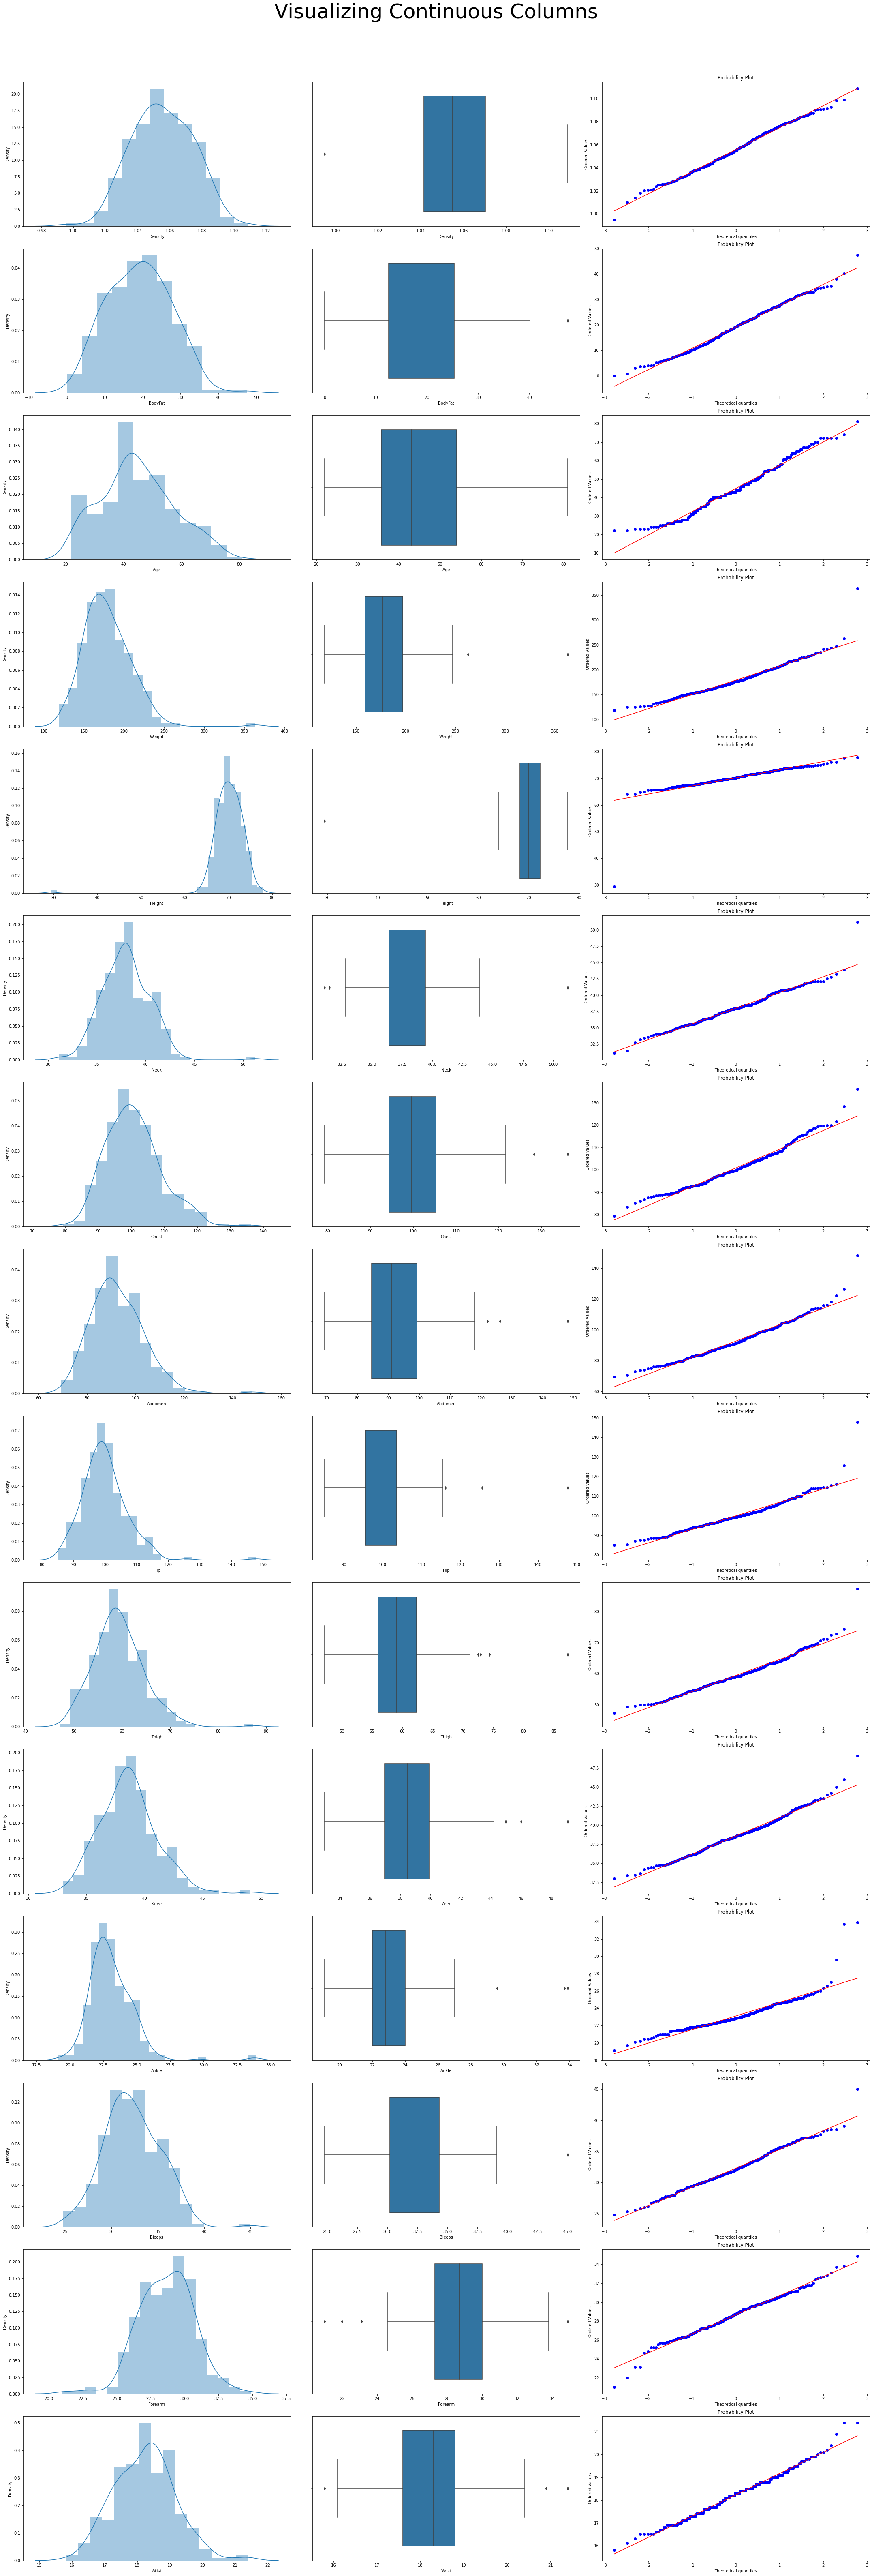

In [16]:
import warnings
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1])
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

In [17]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
Height    -5.384987
Forearm   -0.219333
Density   -0.020176
BodyFat    0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205263
Hip        1.497127
Ankle      2.255134
dtype: float64


<AxesSubplot:>

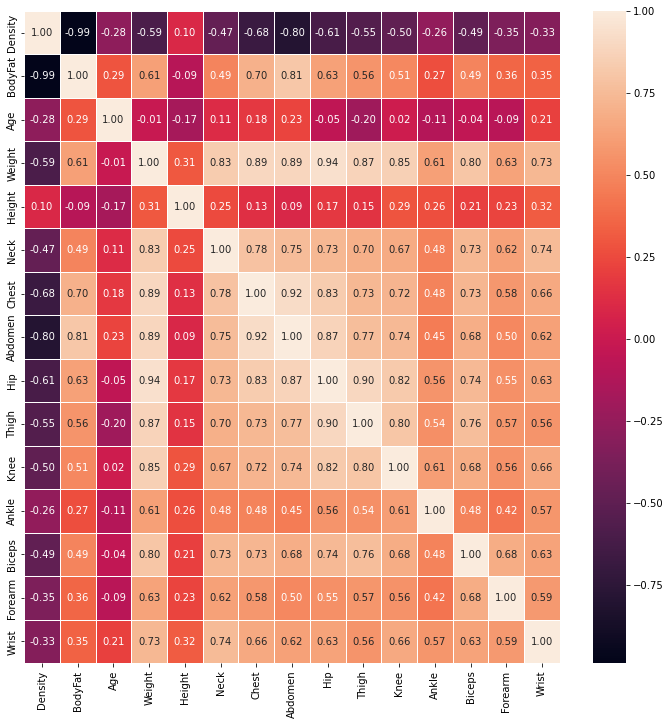

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

In [22]:
X = df.drop(['BodyFat','Density'],axis=1)
y = df['Density']

In [23]:
###Feature Engineering and Preprocessing###

In [24]:
X['Bmi']=703*X['Weight']/(X['Height']*X['Height'])
X.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


In [26]:
X['ACratio'] = X['Abdomen']/X['Chest']
X['HTratio'] = X['Hip']/X['Thigh']
X.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
X.head()

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342


In [29]:
###Removing outliers###
z = np.abs(stats.zscore(X))


X_clean = X[(z<3).all(axis=1)]
y_clean = y[(z<3).all(axis=1)]

In [30]:
X_clean.shape

(242, 10)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)

In [32]:
trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

In [33]:
###Modelling###

In [42]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor

In [44]:
kernel = KernelRidge()
lgbm = LGBMRegressor()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
svr=SVR()
grad = GradientBoostingRegressor()
sgd = SGDRegressor()
bay = BayesianRidge()
clf = [linear,elastic,lasso,ridge,svr,grad,sgd,bay,random,kernel,lgbm]
hashmap={}

In [45]:
from sklearn.metrics import mean_squared_error
def compute(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    hashmap[str(model)]=(r2,rmse)

In [46]:
for i in clf:
    compute(i)

In [47]:
score=pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['R2_score','RMSE']
score = score.sort_values('R2_score',ascending=False)

In [48]:
score

,R2_score,RMSE
LinearRegression(),0.738467,0.010085
Ridge(),0.737161,0.010111
BayesianRidge(),0.730561,0.010237
LGBMRegressor(),0.600773,0.012461
RandomForestRegressor(),0.578106,0.012810
GradientBoostingRegressor(),0.555135,0.013154
SGDRegressor(),0.357910,0.015803
ElasticNet(),-0.010526,0.019825
Lasso(),-0.010526,0.019825
SVR(),-0.081889,0.020513


Text(0.5, 1.0, 'Actual Vs Predicted')

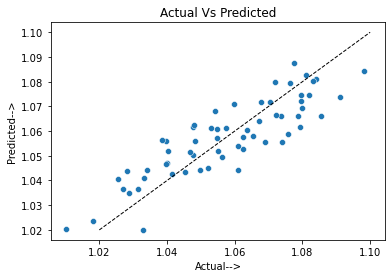

In [49]:
y_pred = linear.predict(X_test)
sns.scatterplot(y_test,y_pred)
plt.plot([1.02, 1.10], [1.02, 1.10], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Actual Vs Predicted")

In [50]:
def predict(values):
    density = linear.predict(values)
    fat = ((4.95/density[0]) - 4.5)*100
    print(f'Density: {density[0]} g/cc\nPercentage Body Fat: {fat} %\n')

In [53]:
predict(X_test[2].reshape(1,-1))

Density: 1.0615895826370119 g/cc
Percentage Body Fat: 16.28189282943895 %

